In [2]:
from slab import *
from matplotlib import pyplot as plt
from slab import dsfit
from slab import dataanalysis
from slab.datamanagement import SlabFile
from numpy import *
import csv
%matplotlib inline
%config InlineBackend.figure_format='retina'

data_dir = r'S:\_Data\160301 - M016 EonHe\data'
exp_dir = r'S:\_Data\160301 - M016 EonHe\experiment'
nbfig_dir = r'C:\Users\slab\Google Drive\grad school\schuster lab\Analysis\IPython Notebooks\Figures'

sys.path.append(exp_dir)
sys.path.append(r'C:\Users\slab\Google Drive\grad school\schuster lab')
from data_cache import dataCacheProxy
from Analysis.Modules import common, fit, anal

In [6]:
wid_data = 3
len_data = 1590

def load_data(datafile):

    with open(datafile, 'rb') as f:
        reader = csv.reader(f)
        for idx,row in enumerate(reader):
            if idx == 0:
                data = np.zeros([len_data,wid_data])

            try:
                for k in range(wid_data):
                    data[idx,k] = float(row[k])
            except: 
                pass

    return data 

### The $\lambda/2$ feature

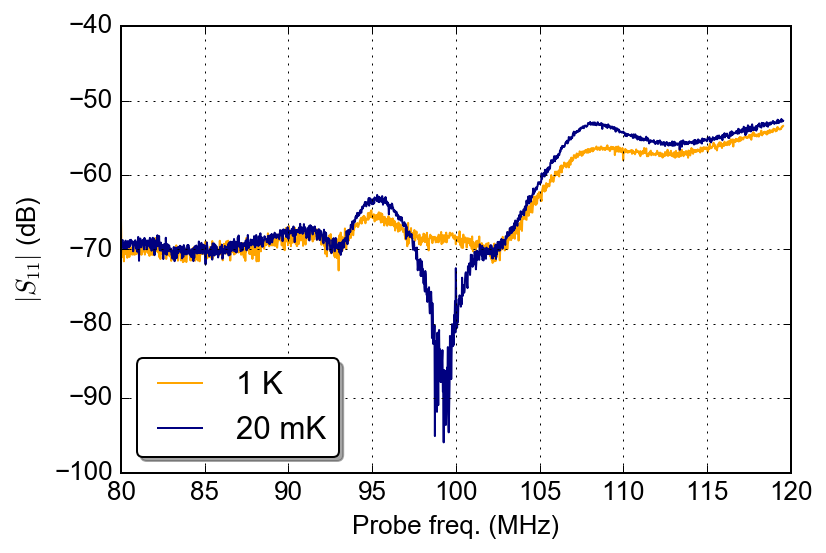

Fit results for S11 func with 1 sigma confidence intervals
---------------------------------------------------------------------
f0 = 98.6023912174 +/- 0.0527476023585
Qc = 36.8204214311 +/- 1.23389542791
Qi = 1193.57239614 +/- 876.272350482
df = 0.628376623331 +/- 0.0419319474126
scale = 0.0470874087535 +/- 0.000670132308637


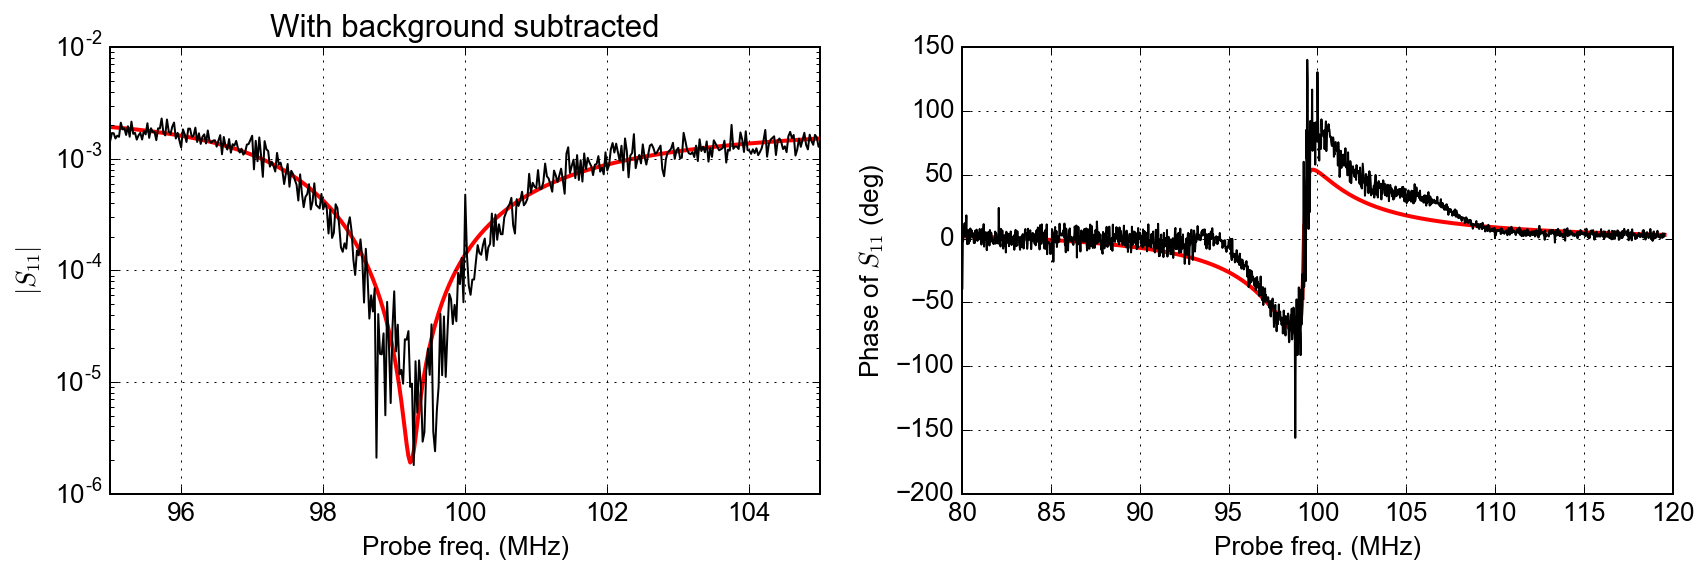

In [31]:
fn_S11_1K = r'100MHz_zoom_1K.csv'
fn_S11_cold = r'100MHz_zoom_50mK.csv'

highT = load_data(os.path.join(data_dir, fn_S11_1K))[3:]
lowT = load_data(os.path.join(data_dir, fn_S11_cold))[3:]

fig1 = plt.figure(figsize = (6.,4.))
common.configure_axes(13)
plt.title('')
plt.plot(highT[:,0]/1E6, highT[:,1], color = 'orange', label='1 K')
plt.plot(lowT[:,0]/1E6, lowT[:,1], color = 'navy', label='20 mK')

plt.xlim(80, 120)
plt.ylim(-100, -40)
plt.xlabel('Probe freq. (MHz)')
plt.ylabel('$|S_{11}|$ (dB)')
plt.legend(fancybox = True , shadow=True, loc=0)
plt.grid()
plt.show()

y = dataanalysis.dBm_to_W(lowT[:,1]-highT[:,1])
x = highT[:,0]/1E6

fig2 = plt.figure(figsize = (14.,4.))
common.configure_axes(13)
plt.subplot(121)
plt.title('With background subtracted')

fr, ferr = dsfit.fit_s11(x, sqrt(y), mode='twoport', domain=(95, 105))
plt.plot(x, abs(dsfit.s11_mag_twoport(x, *fr))**2, '-r', lw=2.0)
plt.plot(x, y, color = 'black')
plt.yscale('log')
plt.xlim(95, 105)
plt.xlabel('Probe freq. (MHz)')
plt.ylabel('$|S_{11}|$')
plt.grid()

offset = 170
plt.subplot(122)
plt.plot(x, unwrap(dsfit.s11_phase_twoport(x, *fr)*180/pi, discont=180/pi)-offset, '-r', lw=2.0)
plt.plot(x, lowT[:,2]-highT[:,2], color = 'black')
plt.xlim(80, 120)
plt.xlabel('Probe freq. (MHz)')
plt.ylabel('Phase of $S_{11}$ (deg)')
plt.grid()

### The $3\lambda/2$ feature

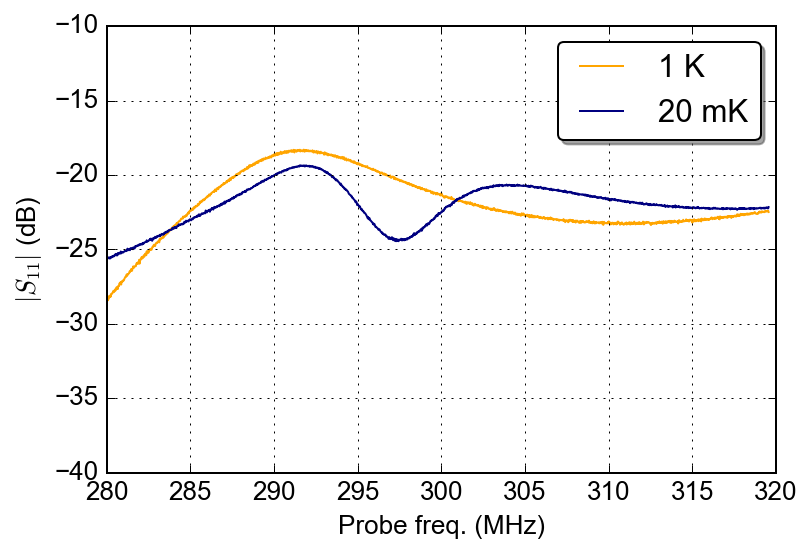

Fit results for S11 func with 1 sigma confidence intervals
---------------------------------------------------------------------
f0 = 299.532574531 +/- 0.0371148124979
Qc = 180.917145161 +/- 4.23486716734
Qi = 120.952190473 +/- 1.39567925623
df = -1.51804940246 +/- 0.0195480880766
scale = 0.0364109268093 +/- 0.000168985926289


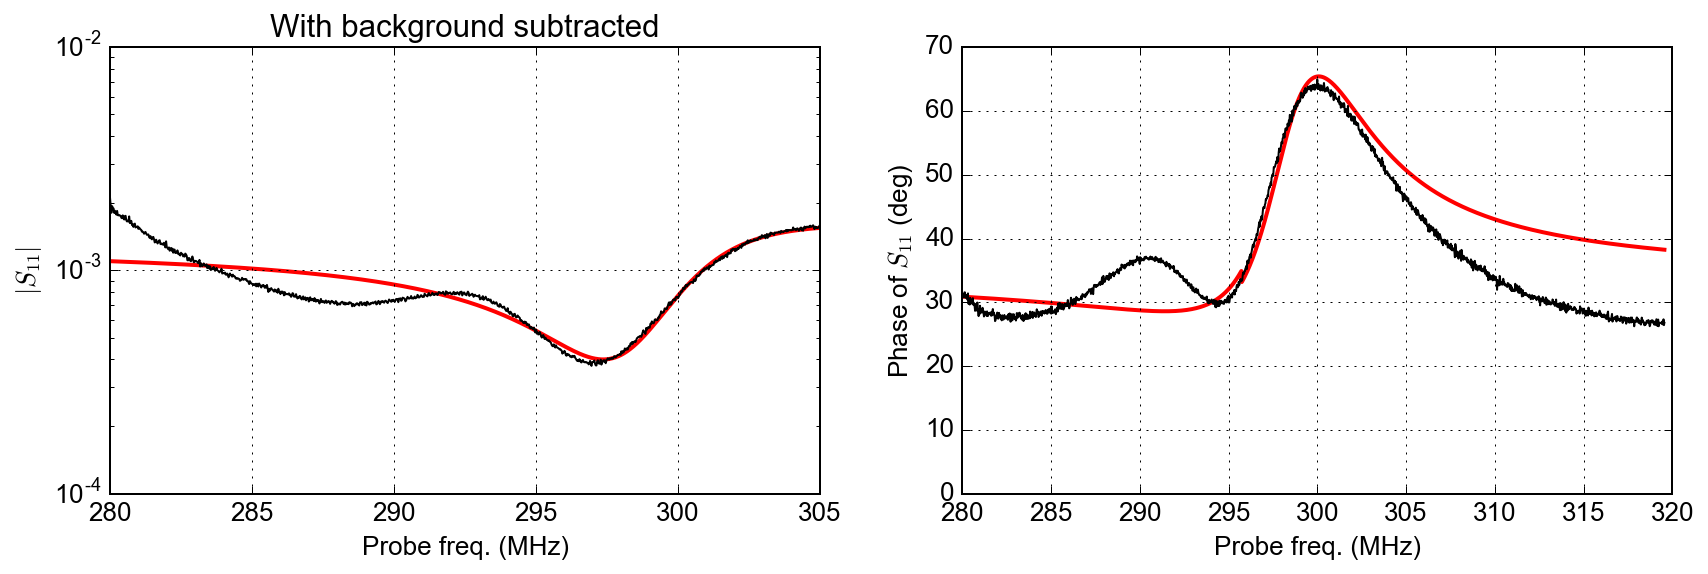

In [38]:
fn_S11_1K = r'300MHz_zoom_1K.csv'
fn_S11_cold = r'300MHz_zoom_50mK.csv'

highT = load_data(os.path.join(data_dir, fn_S11_1K))[3:]
lowT = load_data(os.path.join(data_dir, fn_S11_cold))[3:]

fig1 = plt.figure(figsize = (6.,4.))
common.configure_axes(13)
plt.title('')
plt.plot(highT[:,0]/1E6, highT[:,1], color = 'orange', label='1 K')
plt.plot(lowT[:,0]/1E6, lowT[:,1], color = 'navy', label='20 mK')

plt.xlim(280, 320)
plt.ylim(-40, -10)
plt.xlabel('Probe freq. (MHz)')
plt.ylabel('$|S_{11}|$ (dB)')
plt.legend(fancybox = True , shadow=True, loc=0)
plt.grid()
plt.show()

y = dataanalysis.dBm_to_W(lowT[:,1]-highT[:,1])
x = highT[:,0]/1E6

fig2 = plt.figure(figsize = (14.,4.))
common.configure_axes(13)
plt.subplot(121)
plt.title('With background subtracted')

fr, ferr = dsfit.fit_s11(x, sqrt(y), mode='twoport', domain=(290, 305))
plt.plot(x, abs(dsfit.s11_mag_twoport(x, *fr))**2, '-r', lw=2.0)
plt.plot(x, y, color = 'black')
plt.yscale('log')
plt.xlim(280, 305)
plt.xlabel('Probe freq. (MHz)')
plt.ylabel('$|S_{11}|$')
plt.grid()

offset = 145
plt.subplot(122)
plt.plot(x, unwrap(dsfit.s11_phase_twoport(x, *fr)*180/pi, discont=180/pi)-offset, '-r', lw=2.0)
plt.plot(x, lowT[:,2]-highT[:,2], color = 'black')
plt.xlim(280, 320)
plt.xlabel('Probe freq. (MHz)')
plt.ylabel('Phase of $S_{11}$ (deg)')
plt.grid()

Fit results for S11 func with 1 sigma confidence intervals
---------------------------------------------------------------------
f0 = 99898350.673 +/- 53049.0913333
Qc = 46.43385203 +/- 1.45513487148
Qi = 478.887032327 +/- 129.077661917
df = -417607.646077 +/- 33812.5021602
scale = 1.25916954842 +/- 0.00950251364956
Fit results for S11 func with 1 sigma confidence intervals
---------------------------------------------------------------------
f0 = 99557567.3052 +/- 49628.1409408
Qc = 52.6803261805 +/- 1.53054771715
Qi = 368.059507365 +/- 62.8889816224
df = -255854.725922 +/- 30035.24022
scale = 1.19827749003 +/- 0.00814457522139
Before after difference: 0.34 MHz


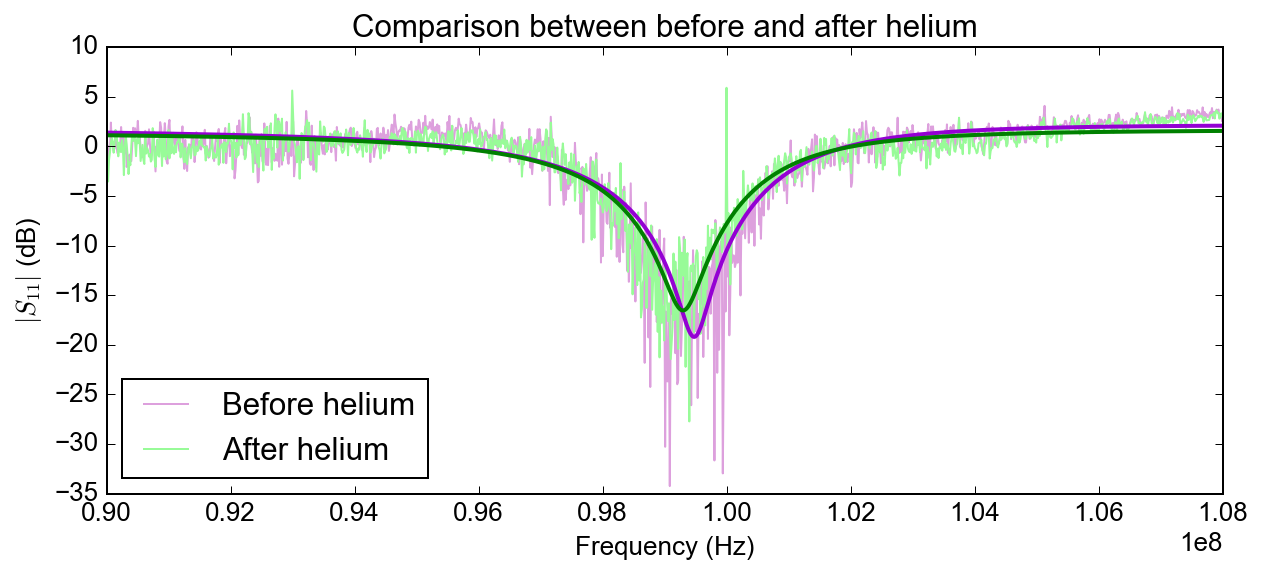

In [71]:
# For reference
fn_S11_1K = r'100MHz_zoom_1K.csv'
highT = load_data(os.path.join(data_dir, fn_S11_1K))[3:]

d = dataCacheProxy(filepath=r'S:\_Data\160301 - M016 EonHe\data\160318\173356_level_meter_expt\level_meter_expt.h5')

def apply_reference_signal(fpoints, magnitude, reference_fpoints, reference_magnitude):
    
    referenced_magnitude = list()
    for idx,f in enumerate(fpoints):
        
        reference_idx = common.find_nearest(f, reference_fpoints)
        referenced_magnitude.append(magnitude[idx] - reference_magnitude[reference_idx])
        
    return array(referenced_magnitude)
        
stacks = d.index()
first_stack = stacks[0]
last_stack = stacks[-1]

fpts_1 = d.get('%s.fpoints'%first_stack)[0]
re_1 = d.get('%s.mags'%first_stack)[0]
im_1 = d.get('%s.phases'%first_stack)[0]

fpts_2 = d.get('%s.fpoints'%last_stack)[0]
re_2 = d.get('%s.mags'%last_stack)[0]
im_2 = d.get('%s.phases'%last_stack)[0]

mag_1 = 10*log10(re_1**2 + im_1**2)
mag_2 = 10*log10(re_2**2 + im_2**2)

mag_1_corrected = apply_reference_signal(fpts_1, mag_1, highT[:,0], highT[:,1])
mag_2_corrected =  apply_reference_signal(fpts_2, mag_2, highT[:,0], highT[:,1])

plt.figure(figsize=(10.,4.))
plt.plot(fpts_1, mag_1_corrected, label="Before helium", color='plum')
plt.plot(fpts_2, mag_2_corrected, label="After helium", color='palegreen')

plt.xlabel("Frequency (Hz)")
plt.ylabel("$|S_{11}|$ (dB)")
plt.legend(loc=0)
plt.title("Comparison between before and after helium")

fitdomain = (90E6, 108E6)
x = fpts_1
y1 = dataanalysis.dBm_to_W(mag_1_corrected)*1E3
y2 = dataanalysis.dBm_to_W(mag_2_corrected)*1E3

fit1 = dsfit.fit_s11(x, sqrt(y1), mode='twoport', domain=fitdomain)
fit2 = dsfit.fit_s11(x, sqrt(y2), mode='twoport', domain=fitdomain)

plt.plot(x, 10*log10(abs(dsfit.s11_mag_twoport(x, *fit1[0]))**2), '-r', lw=2.0, color='darkviolet')
plt.plot(x, 10*log10(abs(dsfit.s11_mag_twoport(x, *fit2[0]))**2), '-r', lw=2.0, color='green')
plt.xlim(fitdomain)

print "Before after difference: %.2f MHz"%((fit1[0][0]-fit2[0][0])/1E6)